In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("df_Cleaned_Salary_Skills_JobTitle.csv")

In [3]:
df = df.loc[:, ~df.T.duplicated()]

In [4]:
# Fehlende Werte in den Spalten anzeigen
msv_summary = df.isnull().sum().sort_values(ascending = False)
print('msv_summary :\n', msv_summary[msv_summary > 0])

msv_summary :
 Company       53
Salary Max     1
dtype: int64


In [5]:
missing_data = df[df.isnull().any(axis=1)]
missing_data 

,Job Title,Company,Location,Salary Min,Salary Max,Description,Extracted Skills,Longitude,Latitude,URL,...,Pandas,Power BI,PyTorch,Python,R,SQL,Snowflake,Spark,Tableau,TensorFlow
41,Data Engineer,NaN,"Pretoria, Tshwane",77760.0,77760.0,We are looking for a BI Analyst and Architect ...,[],28.184720,-25.725000,https://www.adzuna.co.za/land/ad/5046691533?se...,...,0,0,0,0,0,0,0,0,0,0
58,Data Engineer,NaN,"Centurion, Tshwane",32400.0,45360.0,Onex is hiring a Data Engineer to build and ma...,[],28.185860,-25.842500,https://www.adzuna.co.za/details/4698976047?ut...,...,0,0,0,0,0,0,0,0,0,0
119,Machine Learning Engineer,NaN,"Sandton, North Johannesburg",43200.0,59400.0,Description Client based in Sandton is hiring ...,[],28.048330,-26.068610,https://www.adzuna.co.za/details/4123447825?ut...,...,0,0,0,0,0,0,0,0,0,0
156,Data Engineer,NaN,"Pretoria, Tshwane",77760.0,77760.0,We are looking for a BI Analyst and Architect ...,[],28.184720,-25.725000,https://www.adzuna.co.za/land/ad/5046691533?se...,...,0,0,0,0,0,0,0,0,0,0
197,Data Analyst,NaN,"Vélizy-Villacoublay, Versailles",85020.0,566800.0,L'offre Projet Data Analyst Procurement BI Sec...,[],2.190010,48.782830,https://www.adzuna.fr/details/4575847834?utm_m...,...,0,1,0,0,0,0,0,0,0,0
289,Data Scientist,NaN,Madrid,43600.0,45780.0,El/la candidato/a seleccionado deberá cumplir ...,[],-3.724726,40.429254,https://www.adzuna.es/details/5067887187?utm_m...,...,0,0,0,0,0,0,0,0,0,0
448,Data Scientist,NaN,"Johannesburg, Gauteng",72576.0,72576.0,Are you a passionate Senior Data Scientist rea...,[],28.026104,-26.183117,https://www.adzuna.co.za/land/ad/5076892840?se...,...,0,0,0,0,0,0,0,0,0,0
449,Data Scientist,NaN,"Johannesburg, Gauteng",59400.0,59400.0,A leading Information Technology and Business ...,[],28.026104,-26.183117,https://www.adzuna.co.za/land/ad/5079249944?se...,...,0,0,0,0,0,0,0,0,0,0
451,Data Engineer,NaN,"Midrand, North Johannesburg",64800.0,64800.0,Minimum Requirements Matric BSc Computer Scien...,[],28.153060,-26.036670,https://www.adzuna.co.za/land/ad/5059066032?se...,...,0,1,0,0,0,0,0,0,0,0
452,Data Engineer,NaN,"Johannesburg, Gauteng",62208.0,62208.0,Join a company that is committed to creating i...,[],28.026104,-26.183117,https://www.adzuna.co.za/land/ad/5051268112?se...,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df = df.drop(1449)

In [7]:
all_zero_columns = [col for col in df.columns if (df[col] == 0).all()]
print(all_zero_columns)

[]


In [8]:
df.columns

Index(['Job Title', 'Company', 'Location', 'Salary Min', 'Salary Max',
       'Description', 'Extracted Skills', 'Longitude', 'Latitude', 'URL',
       'Created', 'Experience_years', 'Experience_Level', ' Apache Airflow',
       ' Azure', ' Big Data', ' Data Pipelines', ' Deep Learning', ' ETL',
       ' GCP', ' Hadoop', ' Java', ' KPI', ' Kafka', ' Kubernetes',
       ' Machine Learning', ' Pandas', ' Power BI', ' PyTorch', ' Python',
       ' R', ' SQL', ' Scikit-Learn', ' Snowflake', ' Spark', ' Tableau',
       ' TensorFlow', 'AWS', 'Apache Airflow', 'Azure', 'Big Data',
       'Data Pipelines', 'Deep Learning', 'Docker', 'ETL', 'GCP',
       'Google Analytics', 'Hadoop', 'Java', 'KPI', 'Kafka', 'Kubernetes',
       'Machine Learning', 'Pandas', 'Power BI', 'PyTorch', 'Python', 'R',
       'SQL', 'Snowflake', 'Spark', 'Tableau', 'TensorFlow'],
      dtype='object')

In [9]:
df.columns = ['Job_Title', 'Company', 'Location', 'Salary_Min', 'Salary_Max',
       'Description', 'Extracted_Skills', 'Longitude', 'Latitude', 'URL',
       'Created', 'Experience_years', 'Experience_Level', ' Apache_Airflow',
       ' Azure', ' Big_Data', ' Data_Pipelines', ' Deep_Learning',
       ' ETL', ' GCP', ' Hadoop', ' Java', ' KPI', ' Kafka', ' Kubernetes',
       ' Machine_Learning', ' Pandas', ' Power_BI', ' PyTorch', ' Python',
       ' R', ' SQL', ' Scikit_Learn', ' Snowflake', ' Spark', ' Tableau',
       ' TensorFlow', 'AWS', 'Apache_Airflow', 'Azure', 'Big_Data',
       'Data_Pipelines', 'Deep_Learning', 'Docker', 'ETL', 'GCP',
       'Google_Analytics', 'Hadoop', 'Java', 'KPI', 'Kafka', 'Kubernetes',
       'Machine_Learning', 'Pandas', 'Power_BI', 'PyTorch', 'Python', 'R',
       'SQL', 'Snowflake', 'Spark', 'Tableau', 'TensorFlow']

In [10]:
binary_columns = [col for col in df.columns if df[col].dropna().isin([0, 1]).all()]
one_counts = df[binary_columns].sum()
sorted_columns = one_counts.sort_values(ascending = False)
print(sorted_columns)

Machine_Learning     669
 Python              302
 SQL                 274
Azure                232
Big_Data             219
AWS                  201
Data_Pipelines       192
SQL                  140
 Spark               132
R                    132
 Machine_Learning    119
Python               115
ETL                  108
 ETL                  94
Power_BI              73
 R                    67
 Snowflake            58
 Power_BI             56
 Data_Pipelines       52
 GCP                  39
Deep_Learning         35
KPI                   29
 Azure                27
 Big_Data             26
 Kafka                22
 Tableau              20
 Java                 20
Snowflake             18
 Kubernetes           16
 PyTorch              15
 TensorFlow           14
 Hadoop               13
Tableau               12
Kafka                 12
GCP                   11
Java                  10
Kubernetes             9
Docker                 7
Spark                  6
 Pandas                6


In [11]:
column_groups = {}

for col in binary_columns:
    col_base = col.strip().lower().split()[0]  
    if col_base not in column_groups:
        column_groups[col_base] = []
    column_groups[col_base].append(col)

df_merged = df.copy()

for base_col, similar_cols in column_groups.items():
    if len(similar_cols) > 1: 
        df_merged[base_col] = df[similar_cols].max(axis=1)  
        df_merged = df_merged.drop(columns=similar_cols)  


print(df_merged.head())


#df_merged.to_csv("cleaned_dataset.csv", index=False)


                   Job_Title        Company                         Location  \
0              Data Engineer  Catch Recruit      Sandton, North Johannesburg   
1  Machine Learning Engineer       TN Italy  Provincia di Brescia, Lombardia   
2              Data Engineer          Unit8            Warszawa, mazowieckie   
3              Data Engineer          Unit8            Wrocław, dolnośląskie   
4              Data Engineer          Unit8              Kraków, małopolskie   

   Salary_Min  Salary_Max                                        Description  \
0     12960.0     22680.0  Key Responsibilities - Develop and maintain sc...   
1     54500.0     76300.0  Social network you want to login/join with: Ma...   
2     66000.0     84000.0  Who We Are Founded in 2017, Unit8 is a fast-gr...   
3     66000.0     84000.0  Who We Are Founded in 2017, Unit8 is a fast-gr...   
4     66000.0     84000.0  Who We Are Founded in 2017, Unit8 is a fast-gr...   

  Extracted_Skills  Longitude   Latitu

In [12]:
binary_columns = [col for col in df_merged.columns if df_merged[col].dropna().isin([0, 1]).all()]
one_counts = df_merged[binary_columns].sum()
sorted_columns = one_counts.sort_values(ascending = False)
print(sorted_columns)

machine_learning    788
python              417
sql                 414
azure               259
big_data            245
data_pipelines      244
etl                 202
AWS                 201
r                   199
spark               138
power_bi            129
snowflake            76
gcp                  50
deep_learning        41
kafka                34
tableau              32
kpi                  31
java                 30
kubernetes           25
hadoop               18
pytorch              16
tensorflow           15
pandas                9
Docker                7
apache_airflow        4
 Scikit_Learn         4
Google_Analytics      2
dtype: int64


In [13]:
df_merged.columns

Index(['Job_Title', 'Company', 'Location', 'Salary_Min', 'Salary_Max',
       'Description', 'Extracted_Skills', 'Longitude', 'Latitude', 'URL',
       'Created', 'Experience_years', 'Experience_Level', ' Scikit_Learn',
       'AWS', 'Docker', 'Google_Analytics', 'apache_airflow', 'azure',
       'big_data', 'data_pipelines', 'deep_learning', 'etl', 'gcp', 'hadoop',
       'java', 'kpi', 'kafka', 'kubernetes', 'machine_learning', 'pandas',
       'power_bi', 'pytorch', 'python', 'r', 'sql', 'snowflake', 'spark',
       'tableau', 'tensorflow'],
      dtype='object')

In [14]:
#df_merged.drop(columns=["Extracted_Skills", "Description", "Company", "URL"], inplace=True)

In [15]:
df_merged['Avg_Salary'] = (df_merged['Salary_Min'] + df_merged['Salary_Max']) / 2

In [16]:
df_merged.head()

,Job_Title,Company,Location,Salary_Min,Salary_Max,Description,Extracted_Skills,Longitude,Latitude,URL,...,power_bi,pytorch,python,r,sql,snowflake,spark,tableau,tensorflow,Avg_Salary
0,Data Engineer,Catch Recruit,"Sandton, North Johannesburg",12960.0,22680.0,Key Responsibilities - Develop and maintain sc...,[],28.048330,-26.068610,https://www.adzuna.co.za/details/5012435460?ut...,...,0,0,0,0,0,0,0,0,0,17820.0
1,Machine Learning Engineer,TN Italy,"Provincia di Brescia, Lombardia",54500.0,76300.0,Social network you want to login/join with: Ma...,[],10.263698,45.651602,https://www.adzuna.it/land/ad/5083567845?se=xq...,...,0,0,0,0,0,0,0,0,0,65400.0
2,Data Engineer,Unit8,"Warszawa, mazowieckie",66000.0,84000.0,"Who We Are Founded in 2017, Unit8 is a fast-gr...",[],21.245300,52.215190,https://www.adzuna.pl/land/ad/5077274837?se=5N...,...,0,0,0,1,0,0,0,0,0,75000.0
3,Data Engineer,Unit8,"Wrocław, dolnośląskie",66000.0,84000.0,"Who We Are Founded in 2017, Unit8 is a fast-gr...",[],17.038540,51.107890,https://www.adzuna.pl/land/ad/5077279762?se=5N...,...,0,0,0,1,0,0,0,0,0,75000.0
4,Data Engineer,Unit8,"Kraków, małopolskie",66000.0,84000.0,"Who We Are Founded in 2017, Unit8 is a fast-gr...",[],20.178480,50.102400,https://www.adzuna.pl/land/ad/5077279767?se=5N...,...,0,0,0,1,0,0,0,0,0,75000.0


In [17]:
sorted_columns_TopSkills = one_counts[one_counts > 100].sort_values(ascending = False)
print(sorted_columns_TopSkills)

machine_learning    788
python              417
sql                 414
azure               259
big_data            245
data_pipelines      244
etl                 202
AWS                 201
r                   199
spark               138
power_bi            129
dtype: int64


In [18]:
df_merged["Experience_Level"] = df_merged["Experience_Level"].str.lower()

df_merged["Experience_Level"] = df_merged["Experience_Level"].str.replace("-", "_")

df_merged["Experience_Level"].fillna("unknown", inplace=True)

print(df_merged["Experience_Level"].unique())


['junior' 'senior' 'expert' 'mid_level']


C:\Users\izadi\AppData\Local\Temp\ipykernel_20316\2180600893.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged["Experience_Level"].fillna("unknown", inplace=True)


C:\Users\izadi\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\izadi\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\izadi\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\izadi\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:64

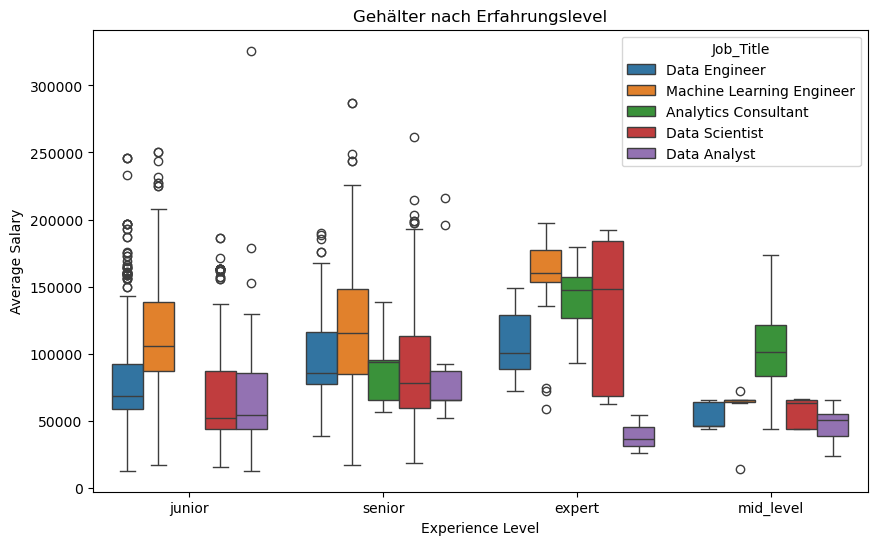

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x="Experience_Level", y="Avg_Salary", hue="Job_Title", data=df_merged)
plt.title("Gehälter nach Erfahrungslevel")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary")
plt.show()


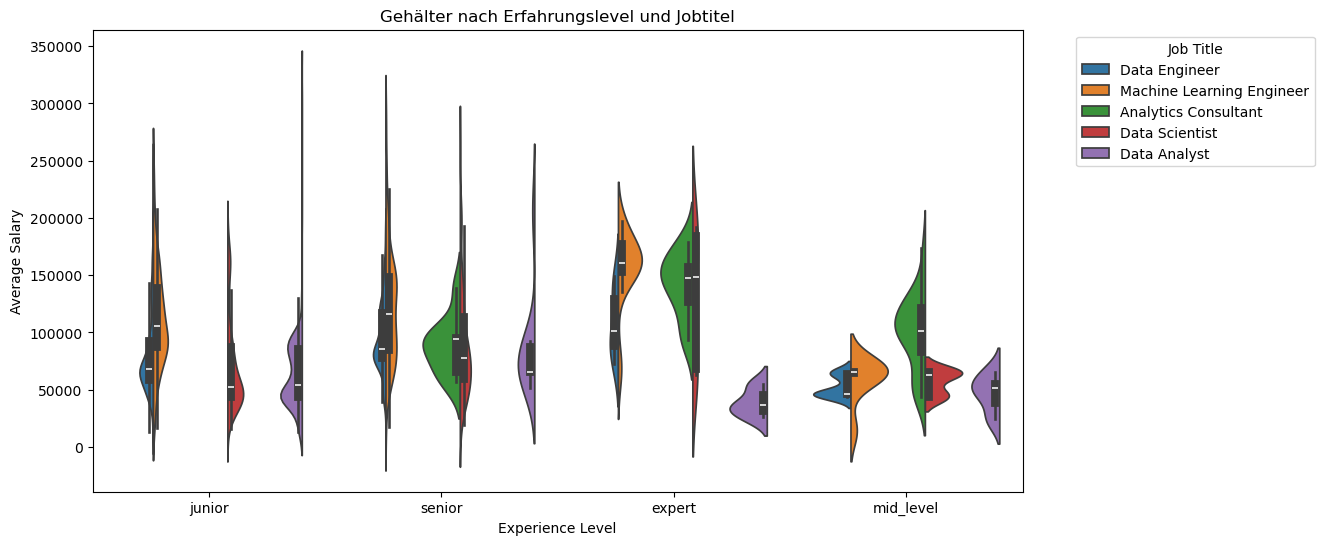

In [20]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="Experience_Level", y="Avg_Salary", hue="Job_Title", data=df_merged, split=True)
plt.title("Gehälter nach Erfahrungslevel und Jobtitel")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary")
plt.legend(title="Job Title", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\izadi\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


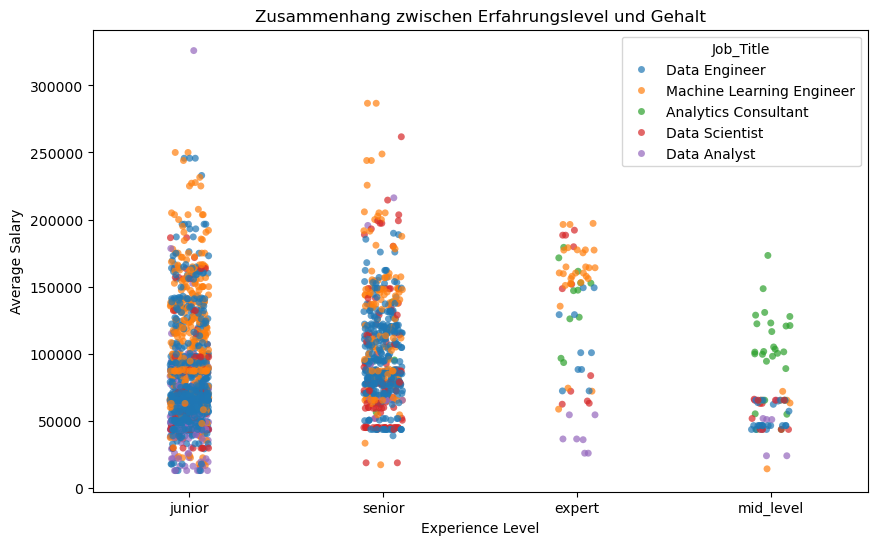

In [21]:
plt.figure(figsize=(10, 6))
sns.stripplot(x="Experience_Level", y="Avg_Salary", hue="Job_Title", data=df_merged, jitter=True, alpha=0.7)
plt.title("Zusammenhang zwischen Erfahrungslevel und Gehalt")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary")
plt.show()


In [22]:
filtered_df = df_merged[(df_merged["Experience_Level"] == "expert") & (df_merged["Job_Title"] == "Data Analyst")]

print(f"Anzahl der Data Analysts mit Experience Level 'Expert': {len(filtered_df)}")


Anzahl der Data Analysts mit Experience Level 'Expert': 7


In [23]:
print(filtered_df)

         Job_Title       Company               Location  Salary_Min  \
463   Data Analyst   Iberempleos                 Madrid     54500.0   
464   Data Analyst           NaN                 Madrid     54500.0   
465   Data Analyst  Michael Page                 Madrid     32700.0   
466   Data Analyst           NaN                 Madrid     34880.0   
467   Data Analyst   Iberempleos                 Madrid     34880.0   
675   Data Analyst           NaN  Johannesburg, Gauteng     25920.0   
1774  Data Analyst           NaN  Johannesburg, Gauteng     25920.0   

      Salary_Max                                        Description  \
463      54500.0  Multinational Healthcare Company Power BI & Sn...   
464      54500.0  The Data Analyst (Power BI focus) will harness...   
465      39240.0  Data Analyst (Sector Banca) Perfil buscado (Ho...   
466      38150.0  Diseñar, construir y mantener pipelines ETL ut...   
467      38150.0  Proyecto estable Formarás parte de un ecosiste...   
675  

In [24]:
import numpy as np

# Filter für Data Analysts mit experience_level = "expert"
mask = (df_merged["Experience_Level"] == "expert") & (df_merged["Job_Title"] == "Data Analyst")

# Ersetze "expert" mit "junior"
df_merged.loc[mask, "Experience_Level"] = "junior"

# Erstelle eine neue Spalte "experience_years" mit Zufallszahlen zwischen 0 und 2
df_merged.loc[mask, "Experience_years"] = np.random.randint(0, 3, mask.sum())  # 0 bis 2 (exklusiv 3)

# Prüfe die Änderungen
print(df_merged.loc[mask, ["Experience_Level", "Experience_years"]])


     Experience_Level  Experience_years
463            junior                 1
464            junior                 0
465            junior                 0
466            junior                 1
467            junior                 2
675            junior                 1
1774           junior                 2


C:\Users\izadi\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\izadi\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\izadi\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\izadi\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:64

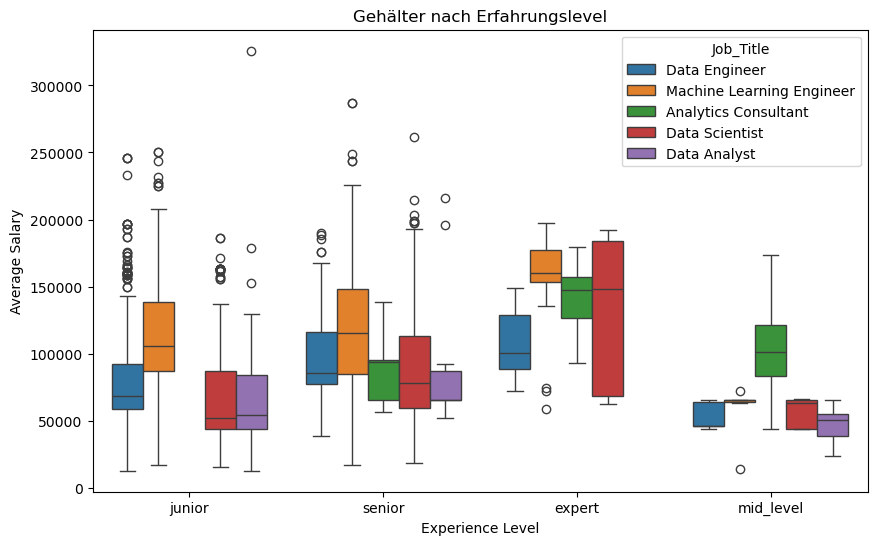

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x="Experience_Level", y="Avg_Salary", hue="Job_Title", data=df_merged)
plt.title("Gehälter nach Erfahrungslevel")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary")
plt.show()


In [26]:
df_merged.head()

,Job_Title,Company,Location,Salary_Min,Salary_Max,Description,Extracted_Skills,Longitude,Latitude,URL,...,power_bi,pytorch,python,r,sql,snowflake,spark,tableau,tensorflow,Avg_Salary
0,Data Engineer,Catch Recruit,"Sandton, North Johannesburg",12960.0,22680.0,Key Responsibilities - Develop and maintain sc...,[],28.048330,-26.068610,https://www.adzuna.co.za/details/5012435460?ut...,...,0,0,0,0,0,0,0,0,0,17820.0
1,Machine Learning Engineer,TN Italy,"Provincia di Brescia, Lombardia",54500.0,76300.0,Social network you want to login/join with: Ma...,[],10.263698,45.651602,https://www.adzuna.it/land/ad/5083567845?se=xq...,...,0,0,0,0,0,0,0,0,0,65400.0
2,Data Engineer,Unit8,"Warszawa, mazowieckie",66000.0,84000.0,"Who We Are Founded in 2017, Unit8 is a fast-gr...",[],21.245300,52.215190,https://www.adzuna.pl/land/ad/5077274837?se=5N...,...,0,0,0,1,0,0,0,0,0,75000.0
3,Data Engineer,Unit8,"Wrocław, dolnośląskie",66000.0,84000.0,"Who We Are Founded in 2017, Unit8 is a fast-gr...",[],17.038540,51.107890,https://www.adzuna.pl/land/ad/5077279762?se=5N...,...,0,0,0,1,0,0,0,0,0,75000.0
4,Data Engineer,Unit8,"Kraków, małopolskie",66000.0,84000.0,"Who We Are Founded in 2017, Unit8 is a fast-gr...",[],20.178480,50.102400,https://www.adzuna.pl/land/ad/5077279767?se=5N...,...,0,0,0,1,0,0,0,0,0,75000.0


In [27]:
# Liste aller Skill-Spalten (alle Spalten mit 0/1 Werten)
binary_columns = [col for col in df_merged.columns if df_merged[col].dropna().isin([0, 1]).all()]

# Neue Spalte "Skills" erstellen
df_merged["Skills"] = df_merged[binary_columns].apply(lambda row: [skill for skill in binary_columns if row[skill] == 1], axis=1)

# Häufigkeit der Skills berechnen
skill_counts = df_merged[binary_columns].sum().sort_values(ascending=False)

# Ergebnisse anzeigen
df_merged[["Job_Title", "Skills"]].head(), skill_counts


(                   Job_Title                       Skills
 0              Data Engineer  [Docker, kafka, kubernetes]
 1  Machine Learning Engineer           [machine_learning]
 2              Data Engineer                          [r]
 3              Data Engineer                          [r]
 4              Data Engineer                          [r],
 machine_learning    788
 python              417
 sql                 414
 azure               259
 big_data            245
 data_pipelines      244
 etl                 202
 AWS                 201
 r                   199
 spark               138
 power_bi            129
 snowflake            76
 gcp                  50
 deep_learning        41
 kafka                34
 tableau              32
 kpi                  31
 java                 30
 kubernetes           25
 hadoop               18
 pytorch              16
 tensorflow           15
 pandas                9
 Docker                7
 apache_airflow        4
  Scikit_Learn      

In [28]:
df_merged.head()

,Job_Title,Company,Location,Salary_Min,Salary_Max,Description,Extracted_Skills,Longitude,Latitude,URL,...,pytorch,python,r,sql,snowflake,spark,tableau,tensorflow,Avg_Salary,Skills
0,Data Engineer,Catch Recruit,"Sandton, North Johannesburg",12960.0,22680.0,Key Responsibilities - Develop and maintain sc...,[],28.048330,-26.068610,https://www.adzuna.co.za/details/5012435460?ut...,...,0,0,0,0,0,0,0,0,17820.0,"[Docker, kafka, kubernetes]"
1,Machine Learning Engineer,TN Italy,"Provincia di Brescia, Lombardia",54500.0,76300.0,Social network you want to login/join with: Ma...,[],10.263698,45.651602,https://www.adzuna.it/land/ad/5083567845?se=xq...,...,0,0,0,0,0,0,0,0,65400.0,[machine_learning]
2,Data Engineer,Unit8,"Warszawa, mazowieckie",66000.0,84000.0,"Who We Are Founded in 2017, Unit8 is a fast-gr...",[],21.245300,52.215190,https://www.adzuna.pl/land/ad/5077274837?se=5N...,...,0,0,1,0,0,0,0,0,75000.0,[r]
3,Data Engineer,Unit8,"Wrocław, dolnośląskie",66000.0,84000.0,"Who We Are Founded in 2017, Unit8 is a fast-gr...",[],17.038540,51.107890,https://www.adzuna.pl/land/ad/5077279762?se=5N...,...,0,0,1,0,0,0,0,0,75000.0,[r]
4,Data Engineer,Unit8,"Kraków, małopolskie",66000.0,84000.0,"Who We Are Founded in 2017, Unit8 is a fast-gr...",[],20.178480,50.102400,https://www.adzuna.pl/land/ad/5077279767?se=5N...,...,0,0,1,0,0,0,0,0,75000.0,[r]


In [29]:
# Überprüfen, ob es fehlende Werte in den Standort-Spalten gibt
missing_location = df_merged["Location"].isna().sum()
missing_longitude = df_merged["Longitude"].isna().sum()
missing_latitude = df_merged["Latitude"].isna().sum()

# Überprüfen, ob Longitude/Latitude ungewöhnliche Werte haben (z.B. 0 oder zu hohe Werte)
invalid_longitude = df_merged[(df_merged["Longitude"] < -180) | (df_merged["Longitude"] > 180)]
invalid_latitude = df_merged[(df_merged["Latitude"] < -90) | (df_merged["Latitude"] > 90)]

# Ergebnisse anzeigen
missing_location, missing_longitude, missing_latitude, invalid_longitude.shape[0], invalid_latitude.shape[0]


(0, 0, 0, 0, 0)

In [30]:
# Fehlende Werte prüfen
print(df_merged[["Location", "Longitude", "Latitude"]].isna().sum())

# Ungültige Longitude- und Latitude-Werte finden
print(df_merged[(df_merged["Longitude"] < -180) | (df_merged["Longitude"] > 180)])  # Longitude sollte zwischen -180 und 180 sein
print(df_merged[(df_merged["Latitude"] < -90) | (df_merged["Latitude"] > 90)])  # Latitude sollte zwischen -90 und 90 sein


Location     0
Longitude    0
Latitude     0
dtype: int64
Empty DataFrame
Columns: [Job_Title, Company, Location, Salary_Min, Salary_Max, Description, Extracted_Skills, Longitude, Latitude, URL, Created, Experience_years, Experience_Level,  Scikit_Learn, AWS, Docker, Google_Analytics, apache_airflow, azure, big_data, data_pipelines, deep_learning, etl, gcp, hadoop, java, kpi, kafka, kubernetes, machine_learning, pandas, power_bi, pytorch, python, r, sql, snowflake, spark, tableau, tensorflow, Avg_Salary, Skills]
Index: []

[0 rows x 42 columns]
Empty DataFrame
Columns: [Job_Title, Company, Location, Salary_Min, Salary_Max, Description, Extracted_Skills, Longitude, Latitude, URL, Created, Experience_years, Experience_Level,  Scikit_Learn, AWS, Docker, Google_Analytics, apache_airflow, azure, big_data, data_pipelines, deep_learning, etl, gcp, hadoop, java, kpi, kafka, kubernetes, machine_learning, pandas, power_bi, pytorch, python, r, sql, snowflake, spark, tableau, tensorflow, Avg_Salar

In [31]:
df_merged.to_csv("Tableau.csv", index=False, sep=",", encoding="utf-8")

In [32]:
df_merged.columns

Index(['Job_Title', 'Company', 'Location', 'Salary_Min', 'Salary_Max',
       'Description', 'Extracted_Skills', 'Longitude', 'Latitude', 'URL',
       'Created', 'Experience_years', 'Experience_Level', ' Scikit_Learn',
       'AWS', 'Docker', 'Google_Analytics', 'apache_airflow', 'azure',
       'big_data', 'data_pipelines', 'deep_learning', 'etl', 'gcp', 'hadoop',
       'java', 'kpi', 'kafka', 'kubernetes', 'machine_learning', 'pandas',
       'power_bi', 'pytorch', 'python', 'r', 'sql', 'snowflake', 'spark',
       'tableau', 'tensorflow', 'Avg_Salary', 'Skills'],
      dtype='object')

# Teil 2

In [1]:
import pandas as pd
import random

In [ ]:
df = pd.read_csv("Tableau.csv")

In [ ]:
junior_mean_salary = df[df["Experience_Level"] == "junior"]["Avg_Salary"].mean()
junior_mean_salary

In [ ]:
senior_mean_salary = df[df["Experience_Level"] == "senior"]["Avg_Salary"].mean()
senior_mean_salary

In [ ]:
mid_level_mean_salary = df[df["Experience_Level"] == "mid_level"]["Avg_Salary"].mean()
mid_level_mean_salary

In [ ]:
expert_mean_salary = df[df["Experience_Level"] == "expert"]["Avg_Salary"].mean()
expert_mean_salary

In [ ]:
def adjust_experience_level(row):
    Experience_Level = row['Experience_Level']  
    Experience_years = row['Experience_years']   
    
    if row['Experience_Level'] == 'junior': 
        if row['Avg_Salary'] >= expert_mean_salary:
            Experience_Level = "expert"
            Experience_years = random.randint(10, 15)
        elif row['Avg_Salary'] >= senior_mean_salary:
            Experience_Level = "senior"
            Experience_years = random.randint(5, 10)
        elif row['Avg_Salary'] >= mid_level_mean_salary:
            Experience_Level = "mid_level"
            Experience_years = random.randint(2, 5)
        elif row['Avg_Salary'] < mid_level_mean_salary:
            Experience_Level = "junior"
            Experience_years = random.randint(0, 2)
        return pd.Series([Experience_Level, Experience_years])  
    else:
        return pd.Series([row['Experience_Level'], row['Experience_years']])  

df[['Experience_Level', 'Experience_years']] = df.apply(adjust_experience_level, axis=1)

print(df)

In [ ]:
df[(df["Experience_Level"] == "junior")].shape

In [ ]:
df[(df["Experience_Level"] == "mid_level")].shape

In [ ]:
df[(df["Experience_Level"] == "senior")].shape

In [ ]:
df[(df["Experience_Level"] == "expert")].shape

In [ ]:
senior_mean_salary_new = df[df["Experience_Level"] == "senior"]["Avg_Salary"].mean()
senior_mean_salary_new

In [ ]:
mid_level_mean_salary_new = df[df["Experience_Level"] == "mid_level"]["Avg_Salary"].mean()
mid_level_mean_salary_new

In [ ]:
expert_mean_salary_new = df[df["Experience_Level"] == "expert"]["Avg_Salary"].mean()
expert_mean_salary_new

In [ ]:
junior_mean_salary_new = df[df["Experience_Level"] == "junior"]["Avg_Salary"].mean()
junior_mean_salary_new

In [ ]:
df.to_csv("Tableau.csv", index=False)